In [1]:
import pandas as pd
import numpy as np
import panel as pn
from scipy.stats import pearsonr
pn.extension("tabulator")

import hvplot.pandas
import matplotlib.pyplot as plt
import seaborn as sns
import palettable

In [2]:
# Import Data.

df = pd.read_excel("nationaldatabaseofchildcareprices.xlsx")

In [3]:
# Check that it imported properly.
df.head()

,State_Name,State_Abbreviation,County_Name,County_FIPS_Code,StudyYear,UNR_16,FUNR_16,MUNR_16,UNR_20to64,FUNR_20to64,...,MFCCToddler,MFCCToddler_flag,MFCCPreschool,MFCCPreschool_flag,_75FCCInfant,_75FCCInfant_flag,_75FCCToddler,_75FCCToddler_flag,_75FCCPreschool,_75FCCPreschool_flag
0,Alabama,AL,Autauga County,1001,2008,5.42,4.41,6.32,4.6,3.5,...,83.45,3.0,81.40,1.0,97.4,1.0,97.4,3.0,95.0,1.0
1,Alabama,AL,Autauga County,1001,2009,5.93,5.72,6.11,4.8,4.6,...,87.39,3.0,85.68,1.0,102.0,1.0,102.0,3.0,100.0,1.0
2,Alabama,AL,Autauga County,1001,2010,6.21,5.57,6.78,5.1,4.6,...,91.33,3.0,89.96,1.0,106.6,1.0,106.6,3.0,105.0,1.0
3,Alabama,AL,Autauga County,1001,2011,7.55,8.13,7.03,6.2,6.3,...,95.28,3.0,94.25,1.0,111.2,1.0,111.2,3.0,110.0,1.0
4,Alabama,AL,Autauga County,1001,2012,8.60,8.88,8.29,6.7,6.4,...,99.22,3.0,98.53,1.0,115.8,1.0,115.8,3.0,115.0,1.0


In [4]:
# Check for na values.
print(df.isna().sum())

State_Name                  0
State_Abbreviation          0
County_Name                 0
County_FIPS_Code            0
StudyYear                   0
                        ...  
_75FCCInfant_flag       11184
_75FCCToddler           11184
_75FCCToddler_flag      11184
_75FCCPreschool         11184
_75FCCPreschool_flag    11184
Length: 227, dtype: int64


In [5]:
# Fill missing values with 0
df = df.fillna(0)

# ppt presentation

In [6]:
# Seperate the data to Texas specifically.

texas = df[df['State_Name'] == 'Texas']
texas.head()

,State_Name,State_Abbreviation,County_Name,County_FIPS_Code,StudyYear,UNR_16,FUNR_16,MUNR_16,UNR_20to64,FUNR_20to64,...,MFCCToddler,MFCCToddler_flag,MFCCPreschool,MFCCPreschool_flag,_75FCCInfant,_75FCCInfant_flag,_75FCCToddler,_75FCCToddler_flag,_75FCCPreschool,_75FCCPreschool_flag
27752,Texas,TX,Anderson County,48001,2008,5.89,4.20,6.95,5.3,2.8,...,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0
27753,Texas,TX,Anderson County,48001,2009,7.79,6.47,8.66,7.2,4.8,...,79.65,1.0,74.50,1.0,99.85,2.0,92.13,1.0,86.55,1.0
27754,Texas,TX,Anderson County,48001,2010,7.01,6.75,7.21,6.2,5.3,...,84.50,1.0,79.75,1.0,105.30,2.0,98.20,1.0,93.05,1.0
27755,Texas,TX,Anderson County,48001,2011,7.40,7.47,7.35,6.4,5.3,...,89.35,1.0,85.00,1.0,110.75,2.0,104.28,1.0,99.55,1.0
27756,Texas,TX,Anderson County,48001,2012,6.97,8.09,6.14,5.8,5.6,...,94.20,1.0,90.25,1.0,116.20,2.0,110.35,1.0,106.05,1.0


In [7]:
# Create an income data base
texInc = df.groupby(df['StudyYear'])['MHI'].mean()/12

# Convert this into a data frame
texInc = pd.DataFrame(texInc)

# Reset the index.
texInc.reset_index(inplace=True)

# Round the values
texInc["MHI"] = texInc["MHI"].round(2)

texInc

,StudyYear,MHI
0,2008,3622.05
1,2009,3621.84
2,2010,3689.19
3,2011,3774.34
4,2012,3803.70
5,2013,3828.09
6,2014,3878.65
7,2015,3902.92
8,2016,3997.77
9,2017,4146.18


In [8]:
# Create a child care data base.
texCC = df.groupby(df['StudyYear'])['MCSA'].mean()*4

# Convert this into a data frame
texCC = pd.DataFrame(texCC)

# Reset the index.
texCC.reset_index(inplace=True)

# Round the values
texCC["MCSA"] = texCC["MCSA"].round(2)

texCC

,StudyYear,MCSA
0,2008,162.61
1,2009,222.19
2,2010,233.15
3,2011,239.19
4,2012,253.97
5,2013,268.13
6,2014,307.43
7,2015,327.38
8,2016,354.36
9,2017,333.58


# Power Point Section

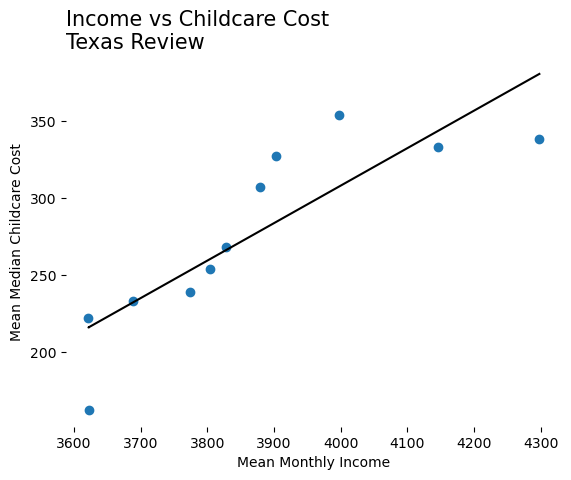

In [9]:
# Make a scatter plot.
x = texInc["MHI"]
y=texCC["MCSA"]

# Get the correlation Coeficient. 
corr= pearsonr(x, y)
plt.scatter(x, y)

# Add labels and title
plt.xlabel('Mean Monthly Income')
plt.ylabel('Mean Median Childcare Cost')
plt.title('Income vs Childcare Cost \nTexas Review', fontsize=15, loc='left')

m, b = np.polyfit(x, y, 1)

# Add line of best fit to plot
plt.plot(x, m*x + b, color='black')
plt.box(False)

plt.savefig('income v cost.jpg') 
# Show plot
plt.show()

In [10]:
corr= pearsonr(x, y)

In [11]:
corr

PearsonRResult(statistic=0.8534005574019983, pvalue=0.0008341957787618901)

In [12]:
texas

,State_Name,State_Abbreviation,County_Name,County_FIPS_Code,StudyYear,UNR_16,FUNR_16,MUNR_16,UNR_20to64,FUNR_20to64,...,MFCCToddler,MFCCToddler_flag,MFCCPreschool,MFCCPreschool_flag,_75FCCInfant,_75FCCInfant_flag,_75FCCToddler,_75FCCToddler_flag,_75FCCPreschool,_75FCCPreschool_flag
27752,Texas,TX,Anderson County,48001,2008,5.89,4.20,6.95,5.3,2.8,...,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0
27753,Texas,TX,Anderson County,48001,2009,7.79,6.47,8.66,7.2,4.8,...,79.65,1.0,74.50,1.0,99.85,2.0,92.13,1.0,86.55,1.0
27754,Texas,TX,Anderson County,48001,2010,7.01,6.75,7.21,6.2,5.3,...,84.50,1.0,79.75,1.0,105.30,2.0,98.20,1.0,93.05,1.0
27755,Texas,TX,Anderson County,48001,2011,7.40,7.47,7.35,6.4,5.3,...,89.35,1.0,85.00,1.0,110.75,2.0,104.28,1.0,99.55,1.0
27756,Texas,TX,Anderson County,48001,2012,6.97,8.09,6.14,5.8,5.6,...,94.20,1.0,90.25,1.0,116.20,2.0,110.35,1.0,106.05,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30541,Texas,TX,Zavala County,48507,2014,10.20,9.87,10.41,9.6,9.5,...,84.50,1.0,83.25,1.0,104.65,2.0,98.95,1.0,97.60,1.0
30542,Texas,TX,Zavala County,48507,2015,12.18,12.60,11.84,12.5,12.9,...,89.25,1.0,84.70,1.0,108.75,2.0,105.10,1.0,100.15,1.0
30543,Texas,TX,Zavala County,48507,2016,11.96,12.65,11.42,12.4,12.6,...,87.05,1.0,85.75,1.0,110.15,2.0,102.75,1.0,101.35,1.0
30544,Texas,TX,Zavala County,48507,2017,10.12,9.38,10.71,9.9,10.3,...,90.15,1.0,86.85,1.0,110.45,2.0,105.45,1.0,101.85,1.0


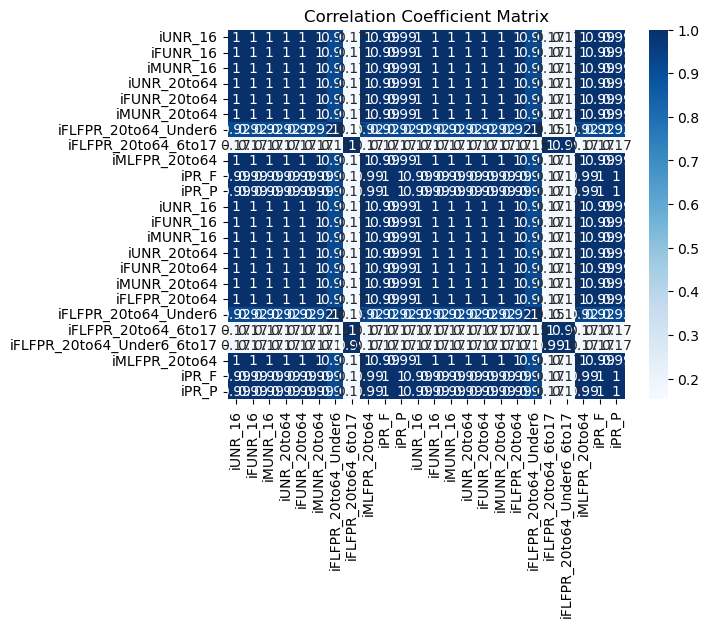

In [13]:
# Make dummie variables for the dataframe.
dumb = pd.get_dummies(texas, drop_first = True)

# Make a dataframe of binary classification variables.
promo = dumb.loc[:, ["iUNR_16", "iFUNR_16", "iMUNR_16", "iUNR_20to64", "iFUNR_20to64", 
                     "iMUNR_20to64", "iFLFPR_20to64_Under6", "iFLFPR_20to64_6to17", 
                     "iMLFPR_20to64", "iPR_F", "iPR_P", "iUNR_16", "iFUNR_16", "iMUNR_16", "iUNR_20to64", 
                     "iFUNR_20to64", "iMUNR_20to64", "iFLFPR_20to64", "iFLFPR_20to64_Under6", 
                     "iFLFPR_20to64_6to17", "iFLFPR_20to64_Under6_6to17", "iMLFPR_20to64", "iPR_F", "iPR_P"]]

# Create a correlation matrix of the previous dataframe.
corr_matrix = promo.corr()

# Plot a correlation coefficient matrix using seaborn. 
sns.heatmap(corr_matrix, annot=True, cmap='Blues')

# Set the title of the matrix.
plt.title("Correlation Coefficient Matrix")

# Use plt show to display the matrix.
plt.show()

# Too hard to read... come back later on this.

In [14]:
# Create unemplyed database
unemp = texas[["StudyYear", "UNR_20to64", "FUNR_20to64", "MUNR_20to64"]].copy()

In [15]:
unemp.head()

,StudyYear,UNR_20to64,FUNR_20to64,MUNR_20to64
27752,2008,5.3,2.8,6.7
27753,2009,7.2,4.8,8.7
27754,2010,6.2,5.3,6.9
27755,2011,6.4,5.3,7.3
27756,2012,5.8,5.6,5.9


In [16]:
# get the mean unemployments by year.

mean_by_year = unemp.groupby('StudyYear')[['UNR_20to64', 'FUNR_20to64', 'MUNR_20to64']].mean()

# Convert to a dataframe.
mean_by_year = pd.DataFrame(mean_by_year)

# Reset the index.
mean_by_year.reset_index(inplace=True)

print(mean_by_year)

    StudyYear  UNR_20to64  FUNR_20to64  MUNR_20to64
0        2008    4.908622     5.202165     4.622205
1        2009    5.370472     5.369685     5.327165
2        2010    5.642126     5.525197     5.735433
3        2011    6.018504     5.599606     6.347244
4        2012    6.305512     6.200787     6.415748
5        2013    6.859055     6.739764     6.968504
6        2014    6.573622     6.514961     6.613386
7        2015    6.288189     6.172835     6.342913
8        2016    5.906693     5.889764     5.908661
9        2017    5.632283     5.548819     5.649213
10       2018    5.268898     5.057874     5.396457


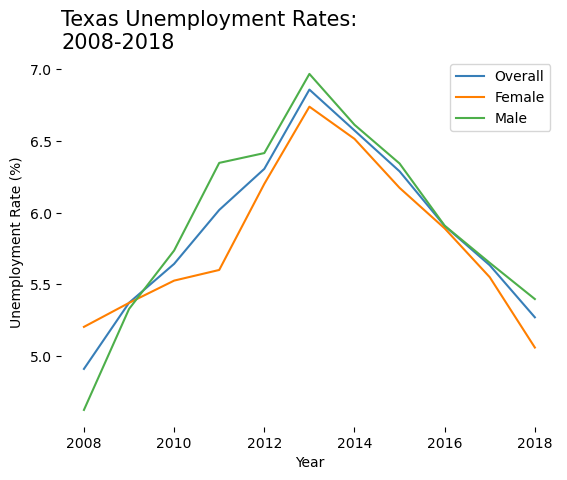

In [17]:
# Make a line plot

x = mean_by_year["StudyYear"]
y1 = mean_by_year["UNR_20to64"]
y2 = mean_by_year["FUNR_20to64"]
y3 = mean_by_year["MUNR_20to64"]


plt.plot(x, y1, label='Overall', color='#377eb8')
plt.plot(x, y2, label='Female', color='#ff7f00')
plt.plot(x, y3, label='Male', color='#4daf4a')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.title('Texas Unemployment Rates: \n2008-2018', fontsize=15, loc='left')

# Adding a legend
plt.legend()

plt.box(False)
plt.savefig('unemployment rates.jpg') 
# Display the plot
plt.show()

In [18]:
# make a sales team dataframe.
sales = texas[["StudyYear", "MEMP_Sales", "FEMP_Sales"]].copy()

# Get the column means.
mean_sales = sales.groupby('StudyYear')[['MEMP_Sales', 'FEMP_Sales']].mean()

# Convert to a dataframe. 
mean_sales = pd.DataFrame(mean_sales)

# Reset the index.
mean_sales.reset_index(inplace=True)

print(mean_sales)

    StudyYear  MEMP_Sales  FEMP_Sales
0        2008   12.885197   33.667008
1        2009   13.051339   33.248189
2        2010   13.261693   33.056142
3        2011   13.358583   33.313425
4        2012   13.499291   33.375197
5        2013   13.312008   33.268661
6        2014   13.232165   33.175906
7        2015   13.022598   33.340236
8        2016   12.769882   33.095512
9        2017   13.050000   32.739213
10       2018   12.120039   31.404646


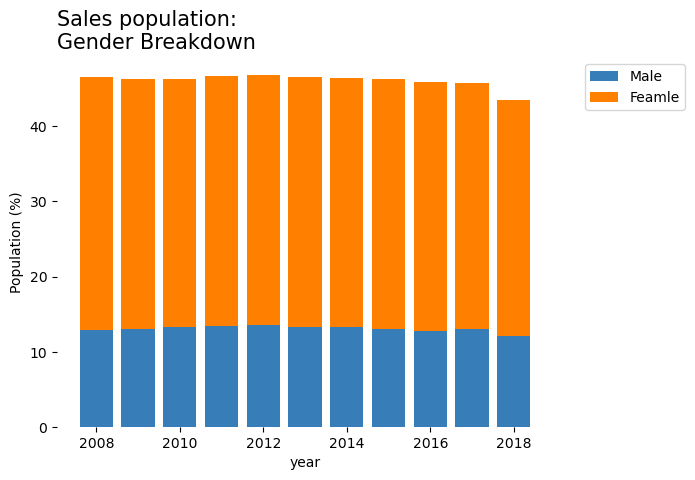

In [19]:
# Make a stacked bar
# Assign values to x, y1, y2
x = mean_sales['StudyYear']
y1 = mean_sales['MEMP_Sales']
y2 = mean_sales['FEMP_Sales']

# plot
plt.bar(x, y1, color='#377eb8')
plt.bar(x, y2, bottom=y1, color='#ff7f00')

# Add labels. 
plt.xlabel("year")
plt.ylabel("Population (%)")
plt.legend(["Male", "Feamle"], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Sales population: \nGender Breakdown", fontsize=15, loc='left')

plt.box(False)

# Save and show.

plt.savefig('sales breakdown.jpg') 
plt.show()

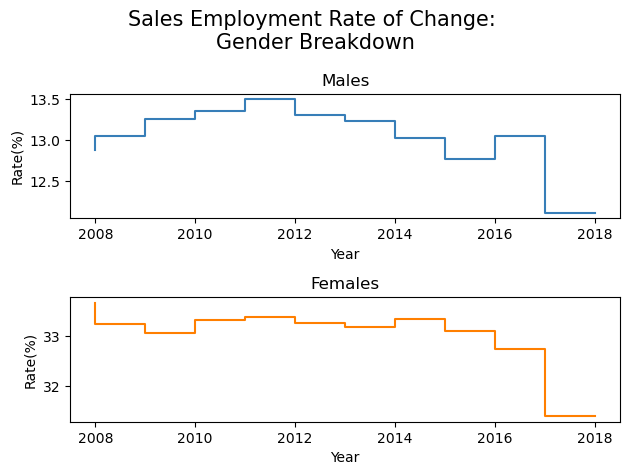

In [20]:
# Make a step plot
# Assign values to x, y1, y2
x = mean_sales['StudyYear']
y1 = mean_sales['MEMP_Sales']
y2 = mean_sales['FEMP_Sales']

# Plot 1
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Sales Employment Rate of Change: \nGender Breakdown', fontsize=15)
ax1.step(x, y1, color='#377eb8')
ax1.set_xlabel('Year')
ax1.set_ylabel('Rate(%)')
ax1.set_title('Males')

# Plot 2
ax2.step(x, y2, color='#ff7f00')
ax2.set_xlabel('Year')
ax2.set_ylabel('Rate(%)')
ax2.set_title('Females')

# Save and show.
plt.tight_layout()
plt.savefig('ROC.jpg') 
plt.show()

In [21]:
# Make data with working families.
populationKids = texas[['StudyYear','TotalPop', 'H_Under6_BothWork', 'H_Under6_FWork', 'H_Under6_MWork', 
                     'H_Under6_SingleM', 'H_6to17_BothWork', 'H_6to17_Fwork', 'H_6to17_Mwork', 'H_6to17_SingleM']].copy()

# Show only 2018 data
populationKids_filtered = populationKids[populationKids['StudyYear'] == 2018]

populationKids_filtered.head()

,StudyYear,TotalPop,H_Under6_BothWork,H_Under6_FWork,H_Under6_MWork,H_Under6_SingleM,H_6to17_BothWork,H_6to17_Fwork,H_6to17_Mwork,H_6to17_SingleM
27762,2018,57863,1215,717,117,974.0,2973,1473,49,2279.0
27773,2018,17818,476,651,0,447.0,1830,816,102,635.0
27784,2018,87607,1846,1400,117,2631.0,6050,2571,326,4356.0
27795,2018,24763,276,204,29,473.0,855,773,0,677.0
27806,2018,8789,340,33,7,68.0,749,253,7,235.0


In [22]:
# Obtain two new values. population with kids and without

total = populationKids_filtered.TotalPop.sum()

kids2 = populationKids_filtered.H_Under6_FWork.sum()

kids4 = populationKids_filtered.H_Under6_SingleM.sum()

kids6 = populationKids_filtered.H_6to17_Fwork.sum()

kids8 = populationKids_filtered.H_6to17_SingleM.sum()

kidPop = kids2+kids4+kids6+kids8
pop = total-kidPop

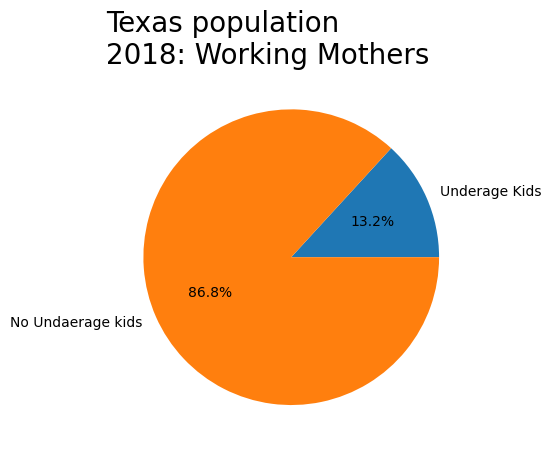

In [23]:
# Create an array of the populations
y = np.array([kidPop, pop])

# Pie plot
plt.pie(y, labels = ["Underage Kids", "No Undaerage kids",], autopct='%.1f%%')

# Add a title
plt.title('Texas population \n2018: Working Mothers', fontsize=20, loc='left')
# Remove plot box.
plt.box(False)
# save and show the pie chart.
plt.savefig('WMpiechart.jpg')
plt.show() 

In [24]:
# Get the mean of the kids population
meanKids = populationKids.groupby('StudyYear')[['H_Under6_BothWork', 'H_Under6_FWork', 'H_Under6_MWork', 
                     'H_Under6_SingleM', 'H_6to17_BothWork', 'H_6to17_Fwork', 'H_6to17_Mwork', 'H_6to17_SingleM']].mean()

# Make a data frame.
meanKids = pd.DataFrame(meanKids)

# Reset the index.
meanKids.reset_index(inplace=True)

meanKids.head()

,StudyYear,H_Under6_BothWork,H_Under6_FWork,H_Under6_MWork,H_Under6_SingleM,H_6to17_BothWork,H_6to17_Fwork,H_6to17_Mwork,H_6to17_SingleM
0,2008,2896.066929,2692.039370,146.763780,2308.019685,6386.574803,3702.137795,358.944882,4037.444882
1,2009,2932.976378,2673.204724,148.204724,2402.531496,6400.200787,3636.566929,363.622047,4104.803150
2,2010,2839.377953,2537.295276,139.653543,2380.795276,6588.255906,3734.035433,354.106299,4345.153543
3,2011,2857.389764,2550.944882,137.492126,2483.358268,6678.173228,3814.622047,358.511811,4516.370079
4,2012,2874.629921,2506.472441,137.173228,2570.271654,6743.066929,3873.500000,355.917323,4670.763780


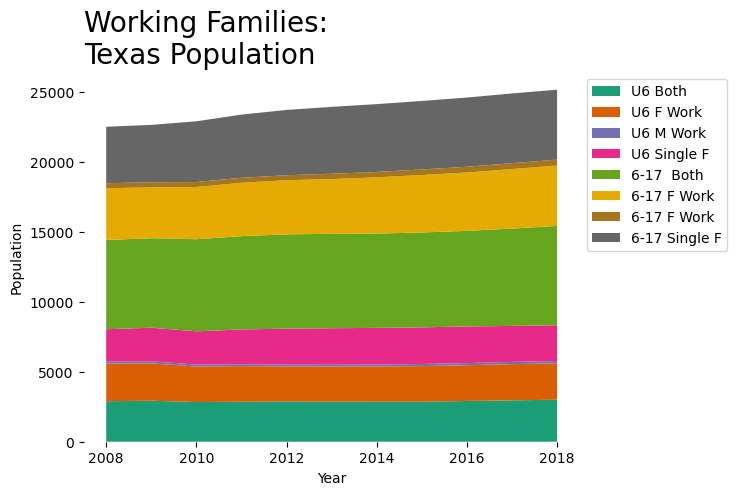

In [25]:
# Assign values to plot to variables.
x = meanKids['StudyYear']
y1 = meanKids['H_Under6_BothWork']
y2 = meanKids['H_Under6_FWork']
y3 = meanKids['H_Under6_MWork']
y4 = meanKids['H_Under6_SingleM']
y5 = meanKids['H_6to17_BothWork']
y6 = meanKids['H_6to17_Fwork']
y7 = meanKids['H_6to17_Mwork']
y8 = meanKids['H_6to17_SingleM']

# Assign the colorblind pallate.
palette = palettable.colorbrewer.qualitative.Dark2_8.mpl_colors

# Create stacked area plot
plt.stackplot(x, y1, y2, y3, y4, y5, y6, y7, y8, colors=palette, labels=['U6 Both', 'U6 F Work', 'U6 M Work', 
                                                                         'U6 Single F', '6-17  Both', '6-17 F Work',
                                                                         '6-17 F Work', '6-17 Single F'])

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Working Families: \nTexas Population', fontsize=20, loc='left')

# Show legend
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.box(False)

plt.savefig('areplt.jpg')
# Display the plot

plt.show()

# Blog section

In [26]:
# Drop unneeded columns.
df = df.drop(['State_Name', 'County_Name', 'County_FIPS_Code'], axis=1)

# sort by state and years to calculat the means for eavh column.
df_grouped = df.groupby(['State_Abbreviation', 'StudyYear']).mean()

# Create a dataframe.
df_grouped = pd.DataFrame(df_grouped)

# Reset the index.
df_grouped.reset_index(inplace=True)

df_grouped.head()

,State_Abbreviation,StudyYear,UNR_16,FUNR_16,MUNR_16,UNR_20to64,FUNR_20to64,MUNR_20to64,FLFPR_20to64,FLFPR_20to64_Under6,...,MFCCToddler,MFCCToddler_flag,MFCCPreschool,MFCCPreschool_flag,_75FCCInfant,_75FCCInfant_flag,_75FCCToddler,_75FCCToddler_flag,_75FCCPreschool,_75FCCPreschool_flag
0,AK,2008,8.896786,7.967500,9.666429,7.872143,7.063571,8.509286,74.233214,72.206786,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AK,2009,10.684483,7.939310,13.245862,10.375862,7.603448,12.993103,77.744828,71.662069,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AK,2010,10.905862,8.184138,13.271034,10.617241,7.882759,12.993103,77.424138,71.737931,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AK,2011,10.670000,7.945172,12.844483,10.406897,7.772414,12.517241,77.468966,71.006897,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AK,2012,10.176897,7.430345,12.400345,9.962069,7.217241,12.206897,77.065517,69.265517,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# Drop the state abbreviation
df1 = df_grouped.drop('State_Abbreviation', axis=1)

In [28]:
# Group by year for mean values.
usTotals = df1.groupby('StudyYear').mean()

# Make a data frame.
usTotals = pd.DataFrame(usTotals)

# Reset the index.
usTotals.reset_index(inplace=True)

usTotals.head()

,StudyYear,UNR_16,FUNR_16,MUNR_16,UNR_20to64,FUNR_20to64,MUNR_20to64,FLFPR_20to64,FLFPR_20to64_Under6,FLFPR_20to64_6to17,...,MFCCToddler,MFCCToddler_flag,MFCCPreschool,MFCCPreschool_flag,_75FCCInfant,_75FCCInfant_flag,_75FCCToddler,_75FCCToddler_flag,_75FCCPreschool,_75FCCPreschool_flag
0,2008,6.174942,6.003497,6.327759,5.462841,5.338208,5.570381,72.162883,67.935146,82.241726,...,54.745245,0.643341,53.324123,0.713675,64.654721,0.941800,61.119119,0.653273,59.949064,0.736347
1,2009,6.889764,6.510765,7.237457,6.212264,5.862392,6.535845,71.621041,67.723293,81.472668,...,58.726106,0.609591,57.367981,0.786512,69.944075,0.966224,65.380245,0.615742,64.075799,0.801286
2,2010,7.488579,6.936675,7.986597,6.836298,6.298649,7.321268,71.779934,68.174131,80.590669,...,61.123999,0.635080,59.760703,0.825020,72.894012,1.017061,68.849446,0.674296,67.222519,0.817123
3,2011,8.154453,7.476780,8.761757,7.510907,6.846053,8.108186,71.791233,68.523606,79.968863,...,64.558016,0.651039,63.147788,0.840911,77.008924,0.991447,73.292825,0.691344,71.559544,0.816877
4,2012,8.677751,7.954620,9.332819,8.056866,7.343256,8.704410,71.793197,68.842222,79.378806,...,73.845237,0.774288,71.947651,0.884279,88.175910,1.188913,83.515480,0.792184,81.348189,0.896875


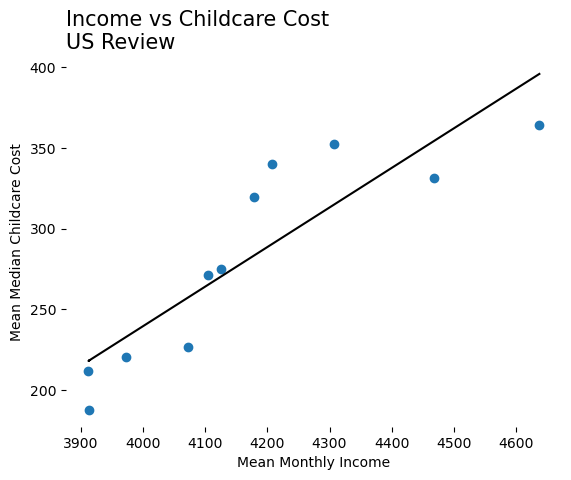

In [29]:
# Assign values to plot.
x = usTotals["MHI"]/12
y = usTotals["MCSA"]*4

# Get the correlation coefficient.
corr= pearsonr(x, y)

# Plot
plt.scatter(x, y)

# Add labels and title
plt.xlabel('Mean Monthly Income')
plt.ylabel('Mean Median Childcare Cost')
plt.title('Income vs Childcare Cost \nUS Review', fontsize=15, loc='left')

m, b = np.polyfit(x, y, 1)

# Add line of best fit to plot
plt.plot(x, m*x + b, color='black')
plt.box(False)

plt.savefig('income v cost.jpg') 
# Show plot
plt.show()

In [30]:
corr

PearsonRResult(statistic=0.8817367216686618, pvalue=0.0003311537366414192)

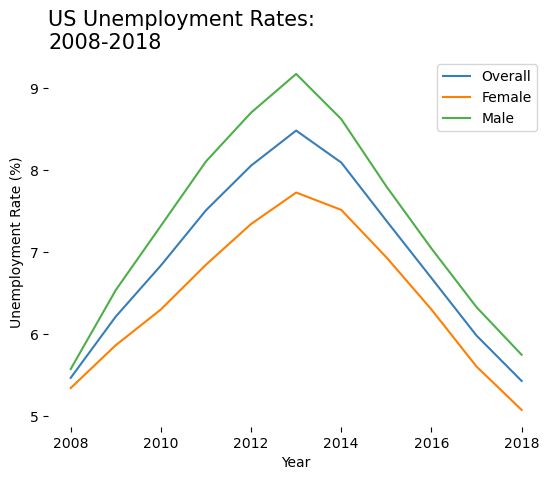

In [31]:
# Assign values to plot.
x = usTotals["StudyYear"]
y1 = usTotals["UNR_20to64"]
y2 = usTotals["FUNR_20to64"]
y3 = usTotals["MUNR_20to64"]

# make line plots.
plt.plot(x, y1, label='Overall', color='#377eb8')
plt.plot(x, y2, label='Female', color='#ff7f00')
plt.plot(x, y3, label='Male', color='#4daf4a')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.title('US Unemployment Rates: \n2008-2018', fontsize=15, loc='left')

# Adding a legend
plt.legend()
plt.box(False)
plt.savefig('unemployment rates.jpg') 
# Display the plot
plt.show()

In [32]:
# Calculate the populations of this with and without kids.

total = usTotals.TotalPop.sum()
kids1 = usTotals.H_Under6_BothWork.sum()
kids2 = usTotals.H_Under6_FWork.sum()
kids3 = usTotals.H_Under6_MWork.sum()
kids4 = usTotals.H_Under6_SingleM.sum()
kids5 = usTotals.H_6to17_BothWork.sum()
kids6 = usTotals.H_6to17_Fwork.sum()
kids7 = usTotals.H_6to17_Mwork.sum()
kids8 = usTotals.H_6to17_SingleM.sum()

kidPop1 = kids1+kids2+kids3+kids4+kids5+kids6+kids7+kids8
pop1 = total-kidPop1

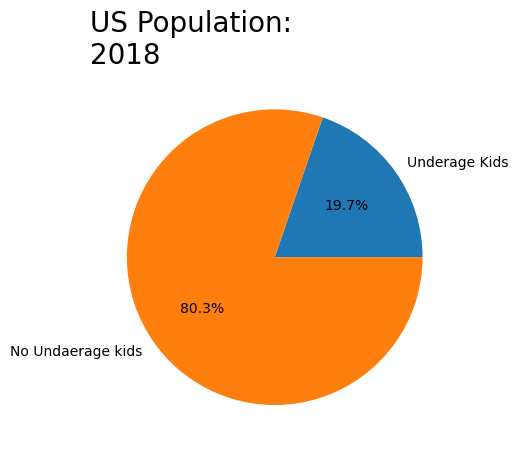

In [33]:
# Make an array of the populations
y = np.array([kidPop1, pop1])

#Plot a pie chart
plt.pie(y, labels = ["Underage Kids", "No Undaerage kids",], autopct='%.1f%%')

# Add a title
plt.title('US Population: \n2018', fontsize=20, loc='left')
# Remove plot box.
plt.box(False)
# save and show the pie chart.
plt.savefig('piechart.jpg')
plt.show() 

In [34]:
# Make a dataframe for those with kids.
withKids = usTotals[['StudyYear', 'H_Under6_BothWork', 'H_Under6_FWork', 'H_Under6_MWork', 
                    'H_Under6_SingleM', 'H_6to17_BothWork', 'H_6to17_Fwork', 
                    'H_6to17_Mwork', 'H_6to17_SingleM']].copy()



In [35]:
# Get the sum of all columns.
withKids['sum'] = withKids[['H_Under6_BothWork', 'H_Under6_FWork', 'H_Under6_MWork', 
                    'H_Under6_SingleM', 'H_6to17_BothWork', 'H_6to17_Fwork', 
                    'H_6to17_Mwork', 'H_6to17_SingleM']].sum(axis=1)

In [36]:
withKids

,StudyYear,H_Under6_BothWork,H_Under6_FWork,H_Under6_MWork,H_Under6_SingleM,H_6to17_BothWork,H_6to17_Fwork,H_6to17_Mwork,H_6to17_SingleM,sum
0,2008,4096.455997,2812.876108,197.707439,2699.854803,9188.276122,3915.820224,530.207201,5550.140410,28991.338304
1,2009,4104.364190,2808.990289,200.762882,2781.620472,9244.724766,3886.156284,543.718568,5625.171618,29195.509071
2,2010,4027.749224,2598.340624,193.285759,2784.252396,9390.030130,3836.439458,525.308600,5705.624523,29061.030715
3,2011,4057.047197,2518.097732,193.307225,2883.863909,9372.085971,3808.744345,520.605015,5773.633037,29127.384431
4,2012,4072.534646,2423.461391,196.747789,2977.403656,9320.427917,3764.037960,523.317452,5844.860055,29122.790867
5,2013,4040.389566,2389.856183,204.460668,3014.774793,9178.484990,3764.308212,534.553756,5870.371664,28997.199830
6,2014,4021.288648,2373.511587,209.477962,3009.032006,9079.463677,3776.694859,540.716186,5872.288640,28882.473566
7,2015,4039.184016,2364.483401,206.583753,3001.937766,9017.115314,3791.128464,539.002026,5874.022362,28833.457101
8,2016,4067.836985,2352.589344,209.681405,2968.360845,9009.834247,3781.645161,543.287613,5844.653915,28777.889514
9,2017,4118.732632,2346.390946,211.863425,2891.144823,9041.486985,3789.782683,550.194124,5796.628875,28746.224493


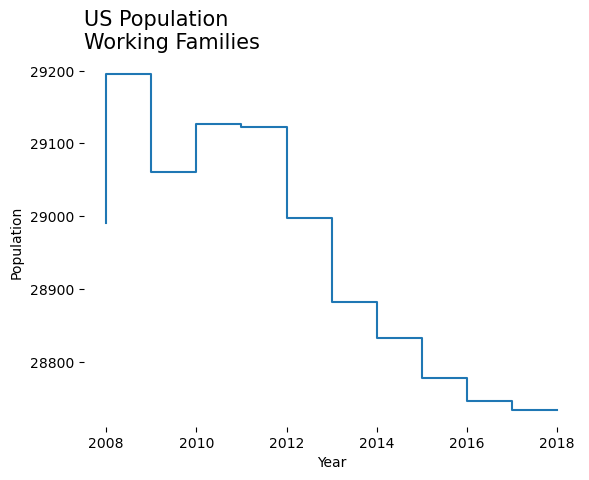

In [37]:
# Assign values to plot.
x = withKids['StudyYear']
y =  withKids['sum']

# Make step plot
plt.step(x, y)  
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('US Population \nWorking Families', fontsize=15, loc='left')
plt.box(False)
# save and show.
plt.savefig('usStep.jpg')
plt.show()

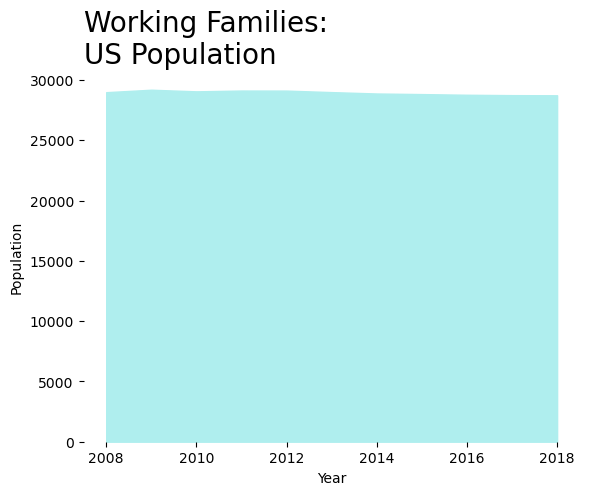

In [38]:
# palette = palettable.colorbrewer.qualitative.Dark2_8.mpl_colors
# Create stacked area plot
plt.stackplot(x, y, color='paleturquoise')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Working Families: \nUS Population', fontsize=20, loc='left')


plt.box(False)

plt.savefig('arepltBlog.jpg')
# Display the plot

plt.show()

In [39]:
# Seperate data by married or single.

withKids['married'] = withKids[['H_Under6_BothWork', 'H_Under6_FWork', 'H_Under6_MWork', 
                                'H_6to17_BothWork', 'H_6to17_Fwork', 'H_6to17_Mwork']].sum(axis=1)

withKids['single'] = withKids[['H_Under6_SingleM', 'H_6to17_SingleM']].sum(axis=1)

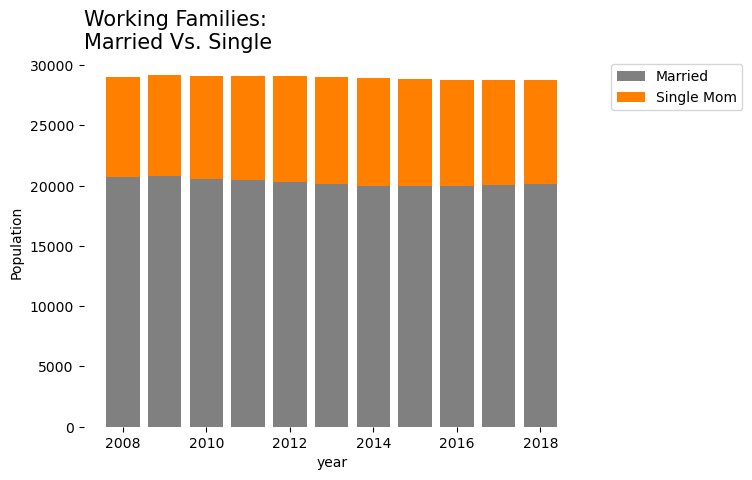

In [40]:
# Assign values to plot
x = withKids['StudyYear']
y1 = withKids['married']
y2 = withKids['single']

# Make stacked bar   
plt.bar(x, y1, color='grey')
plt.bar(x, y2, bottom=y1, color='#ff7f00')

plt.xlabel("year")
plt.ylabel("Population")
plt.legend(["Married", "Single Mom"], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Working Families: \nMarried Vs. Single", fontsize=15, loc='left')
plt.box(False)
plt.savefig('sales breakdown.jpg') 
plt.show()